# Shell model single-particle energy levels

Usign the mean field


In [16]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

In [17]:
# Constants

hbar = 6.582119569*10**(-22)           # MeV*s
c = 2.99792458*10**(8)*10**(15)        # fm/s
m_p = 938.27/c**2                      # MeV*s²/fm²
m_n = 939.57/c**2                      # MeV*s²/fm²

def hbaromega(A):                          # Parameters: A mass number of nucleus
    return 45*A**(-1/3) - 25*A**(-2/3) 

def b(m,A):                                # Parameters: m mass of nucleon, A mass number of nucleus
    return hbar/np.sqrt(m*hbaromega(A))

In [18]:
# Terms of the hamiltonian

def Kinetic(r, n, l, m, A):    # Parameters: r coordinate, n radial quantum number, l orbital angular momentum,
                               #             m mass of nucleon, A mass number of nucleus
    bv = b(m,A)
    return hbar**2/(2*m)*((4*n+2*l+3)/bv**2 - r**2/bv**4)

def Woods_Saxon(r, N, Z, part):           # Parameters: r coordinate, N number of neutrons, Z number of protons, 
                                          #             part = 0 for protons and 1 for neutrons
    V0 = 51 + (-1)**part*(N-Z)/(N+Z)      # MeV
    a = 0.67                              # fm
    R = 1.27*(N+Z)**(1/3)                 # fm
    
    return (-V0)/(1 + np.exp((r-R)/a))
 
def Coulomb(r, N, Z, part):                  # Parameters: r coordinate, Z number of protons,
                                             #             part = 0 for protons and 1 for neutrons
    R = 1.27*(N+Z)**(1/3)                    # fm
    ep0 = 55.26349406*10**(-3)               # vacuum permittivity in e²/(MeV*fm)
    fact = Z/(4*np.pi*ep0)
    
    if r <= R:
        return (1-part)*fact*(3-(r/R)**2)/(2*R)
    if r > R:
        return (1-part)*fact*1/r  
    
def Spin_Orbit(r, N, Z, part, l, j):      # Parameters: r coordinate, N number of neutrons, Z number of protons,
                                          #             part = 0 for protons and 1 for neutrons
                                          #             l orbital angular momentum, j total angular momentum

    V0 = 51 + (-1)**part*(N-Z)/(N+Z)      # MeV
    a = 0.67                              # fm
    R = 1.27*(N+Z)**(1/3)                 # fm
    ang = 1/2*(j*(j+1) - l*(l+1) - 3/4)   
    
    return 0.44*V0*(1.27)**2*1/r*(-np.exp((r-R)/a)/(a*(1 + np.exp((r-R)/a))**2))*ang

In [46]:
# Harmonic oscillator radial wavefunction

def psiHO(r, n, l, m, A):                 # Parameters: r coordinate, n radial quantum number
                                          #             l orbital angular momentum,
                                          #             m mass of nucleon, A mass number of nucleus
    bv = b(m,A)
    norm = np.sqrt(2*scp.special.factorial(n)/(bv**3*scp.special.gamma(n+l+3/2)))
    return norm*(r/bv)**l*np.exp(-r**2/(2*bv**2))*scp.special.assoc_laguerre(r**2/bv**2, n, k = l+1/2)

In [56]:
def checkOrth(r,n1,l1,m,A,n2,l2):
    bv = b(m,A)
    norm1 = np.sqrt(2*scp.special.factorial(n1)/(bv**3*scp.special.gamma(n1+l1+3/2)))
    f1 = norm1*(r/bv)**l1*np.exp(-r**2/(2*bv**2))*scp.special.assoc_laguerre(r**2/bv**2, n1, k = l1+1/2)

    
    norm2 = np.sqrt(2*scp.special.factorial(n2)/(bv**3*scp.special.gamma(n2+l2+3/2)))
    f2 = norm2*(r/bv)**l2*np.exp(-r**2/(2*bv**2))*scp.special.assoc_laguerre(r**2/bv**2, n2, k = l2+1/2)
    
    return r**2*f1*f2

In [60]:
import scipy.integrate as integrate
integrate.quad(checkOrth, 0, 300, args=(0, 1, m_p, 238, 9,1))

(1.3444106938820255e-17, 2.006278504193795e-09)

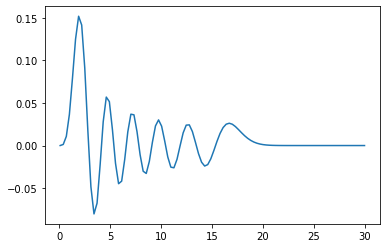

In [47]:
plt.plot(np.linspace(0.1,30,100),psiHO(np.linspace(0.1,30,100), 10, 4, m_p, 238))

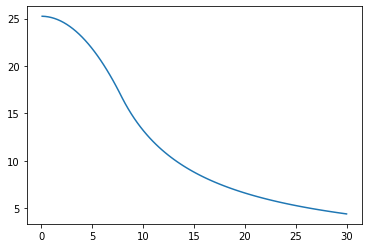

In [20]:
c = []
r = np.linspace(0.1,30,100)

for i in r:
    
    c.append(Coulomb(i,238-92,92,0))
    
plt.plot(r,c)

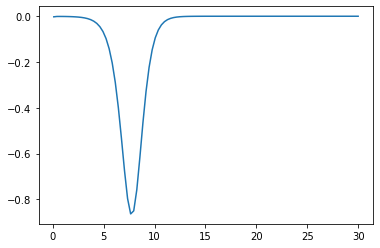

In [21]:
plt.plot(np.linspace(0.1,30,100),Spin_Orbit(np.linspace(0.1,30,100),238-92,92,0,1,3/2))

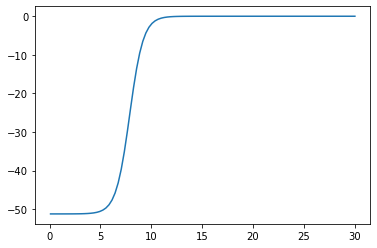

In [22]:
plt.plot(np.linspace(0.1,30,100),Woods_Saxon(np.linspace(0.1,30,100),238-92,92,0))

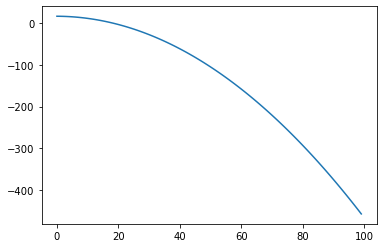

In [23]:
plt.plot(Kinetic(np.linspace(0.1,30,100), 0, 1, m_p, 238))

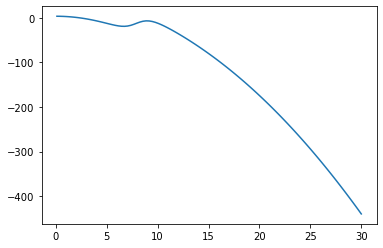

In [24]:
plt.plot(r,Kinetic(np.linspace(0.1,30,100), 1, 1, m_p, 238)+np.array(c)+Woods_Saxon(np.linspace(0.1,30,100),238-92,92,0)+Spin_Orbit(np.linspace(0.1,30,100),238-92,92,0,1,3/2))